In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
msft= yf.download(tickers = "MSFT",period = "6d",group_by = 'ticker')

[*********************100%***********************]  1 of 1 completed


In [9]:
msft=msft[:5]

In [10]:
msft["AvgP"] = (msft["Open"]+msft["High"]+ msft["Low"]+msft["Close"])/4
msft["TWAP"]= np.mean(msft["AvgP"])
msft["Comparison"]= (msft["TWAP"]>msft["AvgP"] )
msft


<ipython-input-10-1da8a7f55a1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["AvgP"] = (msft["Open"]+msft["High"]+ msft["Low"]+msft["Close"])/4
<ipython-input-10-1da8a7f55a1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["TWAP"]= np.mean(msft["AvgP"])
<ipython-input-10-1da8a7f55a1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Open,High,Low,Close,Adj Close,Volume,AvgP,TWAP,Comparison
Date,,,,,,,,,
2022-09-19,242.470001,245.139999,240.850006,244.520004,244.520004,26826900,243.245003,241.225,False
2022-09-20,242.070007,243.509995,239.639999,242.449997,242.449997,26660300,241.917500,241.225,False
2022-09-21,244.270004,247.660004,238.899994,238.949997,238.949997,28625600,242.445000,241.225,False
2022-09-22,237.869995,243.860001,237.570007,240.979996,240.979996,31061200,240.070000,241.225,True
2022-09-23,239.539993,241.130005,235.199997,237.919998,237.919998,34137200,238.447498,241.225,True


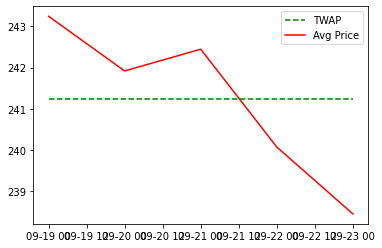

In [11]:
x = msft.index
fig, ax = plt.subplots()
ax.plot(x, msft["TWAP"], '--g', label='TWAP')
ax.plot(x, msft["AvgP"], '-r', label='Avg Price')
leg = ax.legend();

From the above, styarting 09/22, the Avg price plummets to below the TWAP. This is indicative of the order price on these two dates i.e 09/22 and 09/23, being undervalued. Prior to 09/22 as TWAP < Avg price, the order price would have been overvalued. 